<a href="https://colab.research.google.com/github/Nihala-RI/Machine-Learning/blob/main/Regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
import pandas as pd
data=pd.read_csv("/content/ToyotaCorolla.csv",encoding='latin1')

In [ ]:
data.head(10)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
data.shape

(1436, 38)

In [ ]:
data.drop('Id',axis=1,inplace=True)

In [ ]:
data.describe()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [ ]:
data[data.duplicated()]

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


In [ ]:
data['Model'].value_counts(),data['Fuel_Type'].value_counts(),data['Color'].value_counts()

(TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors     107
 TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors      83
 TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors        79
 TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors       70
 TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors       43
                                                        ... 
 TOYOTA Corolla 2.0D 4/5-Doors                             1
 TOYOTA Corolla 1.6 16v TERRA 4/5-Doors                    1
 TOYOTA Corolla 1.6 HB SOL 2/3-Doors                       1
  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors      1
 TOYOTA Corolla 1.3 Linea Terra 4/5-Doors                  1
 Name: Model, Length: 372, dtype: int64,
 Petrol    1264
 Diesel     155
 CNG         17
 Name: Fuel_Type, dtype: int64,
 Grey      301
 Blue      283
 Red       278
 Green     220
 Black     191
 Silver    122
 White      31
 Violet      4
 Yellow      3
 Beige       3
 Name: Color, dtype: int64)

In [ ]:
le=LabelEncoder()

In [ ]:
data['Model'] = le.fit_transform(data['Model'])
data['Fuel_Type'] = le.fit_transform(data['Fuel_Type'])
data['Color'] = le.fit_transform(data['Color'])

In [ ]:
data['Model'].value_counts(),data['Fuel_Type'].value_counts(),data['Color'].value_counts()

(81     107
 8       83
 85      79
 87      70
 93      43
       ... 
 274      1
 136      1
 156      1
 300      1
 38       1
 Name: Model, Length: 372, dtype: int64,
 2    1264
 1     155
 0      17
 Name: Fuel_Type, dtype: int64,
 4    301
 2    283
 5    278
 3    220
 1    191
 6    122
 8     31
 7      4
 9      3
 0      3
 Name: Color, dtype: int64)

In [ ]:
data['Model'].unique()

array([257, 365, 256, 362, 251, 360, 357, 226, 224, 223, 354, 350, 129,
        97, 322,  96,  95, 321, 315,  52, 304,  51, 303,  50, 254, 363,
       253,  57, 364, 225, 307, 103, 227, 327, 335,  56, 325, 324, 102,
       192, 249,  62, 305, 106, 105, 142, 308, 314, 252, 247, 361, 243,
       137, 259,  69,  99,  98, 349, 323, 371, 298, 370, 297, 250, 255,
       248, 366, 326, 100, 195,  55, 210,   2, 353, 295, 219, 355, 123,
       328, 101, 119, 104,  54, 329,  63, 118, 342, 139, 120,  74, 214,
       213,  53, 306, 193,  49, 316, 215, 230, 260, 258, 111, 231, 229,
       228, 235, 239, 113, 238,  59, 117,  73, 242, 109, 115, 114, 190,
       152, 121, 124,  60, 291,  58, 199, 232, 116, 107,  81, 128, 146,
       188, 212, 218, 125, 181,  71,  66, 138, 186, 108, 204, 222, 336,
       217, 293, 112, 311, 331, 347, 313, 122, 352,  15, 198, 179,  72,
       356, 237, 266, 203, 265, 234, 240, 359, 330, 233, 274,  85, 136,
       340, 156, 367, 300, 368, 333, 332, 194, 344,  68, 337, 33

In [ ]:
x=data.drop('Price',axis=1)
y=data['Price']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
featurescores=pd.concat([df_columns,df_scores],axis=1)
featurescores.columns=['Feature','Scores']
featurescores.sort_values(by='Scores',ascending=False)

,Feature,Scores
4,KM,1.401595e+07
0,Model,2.880517e+04
10,cc,1.919225e+04
14,Quarterly_Tax,8.195440e+03
1,Age_08_04,7.606454e+03
15,Weight,2.185260e+03
18,Guarantee_Period,1.531491e+03
6,HP,1.061616e+03
23,Automatic_airco,9.206472e+02
24,Boardcomputer,5.705348e+02


In [ ]:
selected_features_indices=fit.get_support()
selected_features_indices

array([ True,  True, False, False,  True, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False])

In [ ]:
selected_features_indices=fit.get_support()
column_names=x.columns[selected_features_indices]
x_selected = x[column_names]

In [ ]:
data=pd.concat([x_selected,data['Price']],axis=1)
data

,Model,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight,Guarantee_Period,Automatic_airco,Boardcomputer,Price
0,257,23,46986,90,2000,210,1165,3,0,1,13500
1,257,23,72937,90,2000,210,1165,3,0,1,13750
2,365,24,41711,90,2000,210,1165,3,0,1,13950
3,257,26,48000,90,2000,210,1165,3,0,1,14950
4,256,30,38500,90,2000,210,1170,3,0,1,13750
...,...,...,...,...,...,...,...,...,...,...,...
1431,5,69,20544,86,1300,69,1025,3,0,0,7500
1432,8,72,19000,86,1300,69,1015,3,0,0,10845
1433,8,71,17016,86,1300,69,1015,3,0,0,8500
1434,8,70,16916,86,1300,69,1015,3,0,0,7250


<ipython-input-43-42c5d6737061>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,i+1)
<ipython-input-43-42c5d6737061>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-43-42c5d6737061>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the 

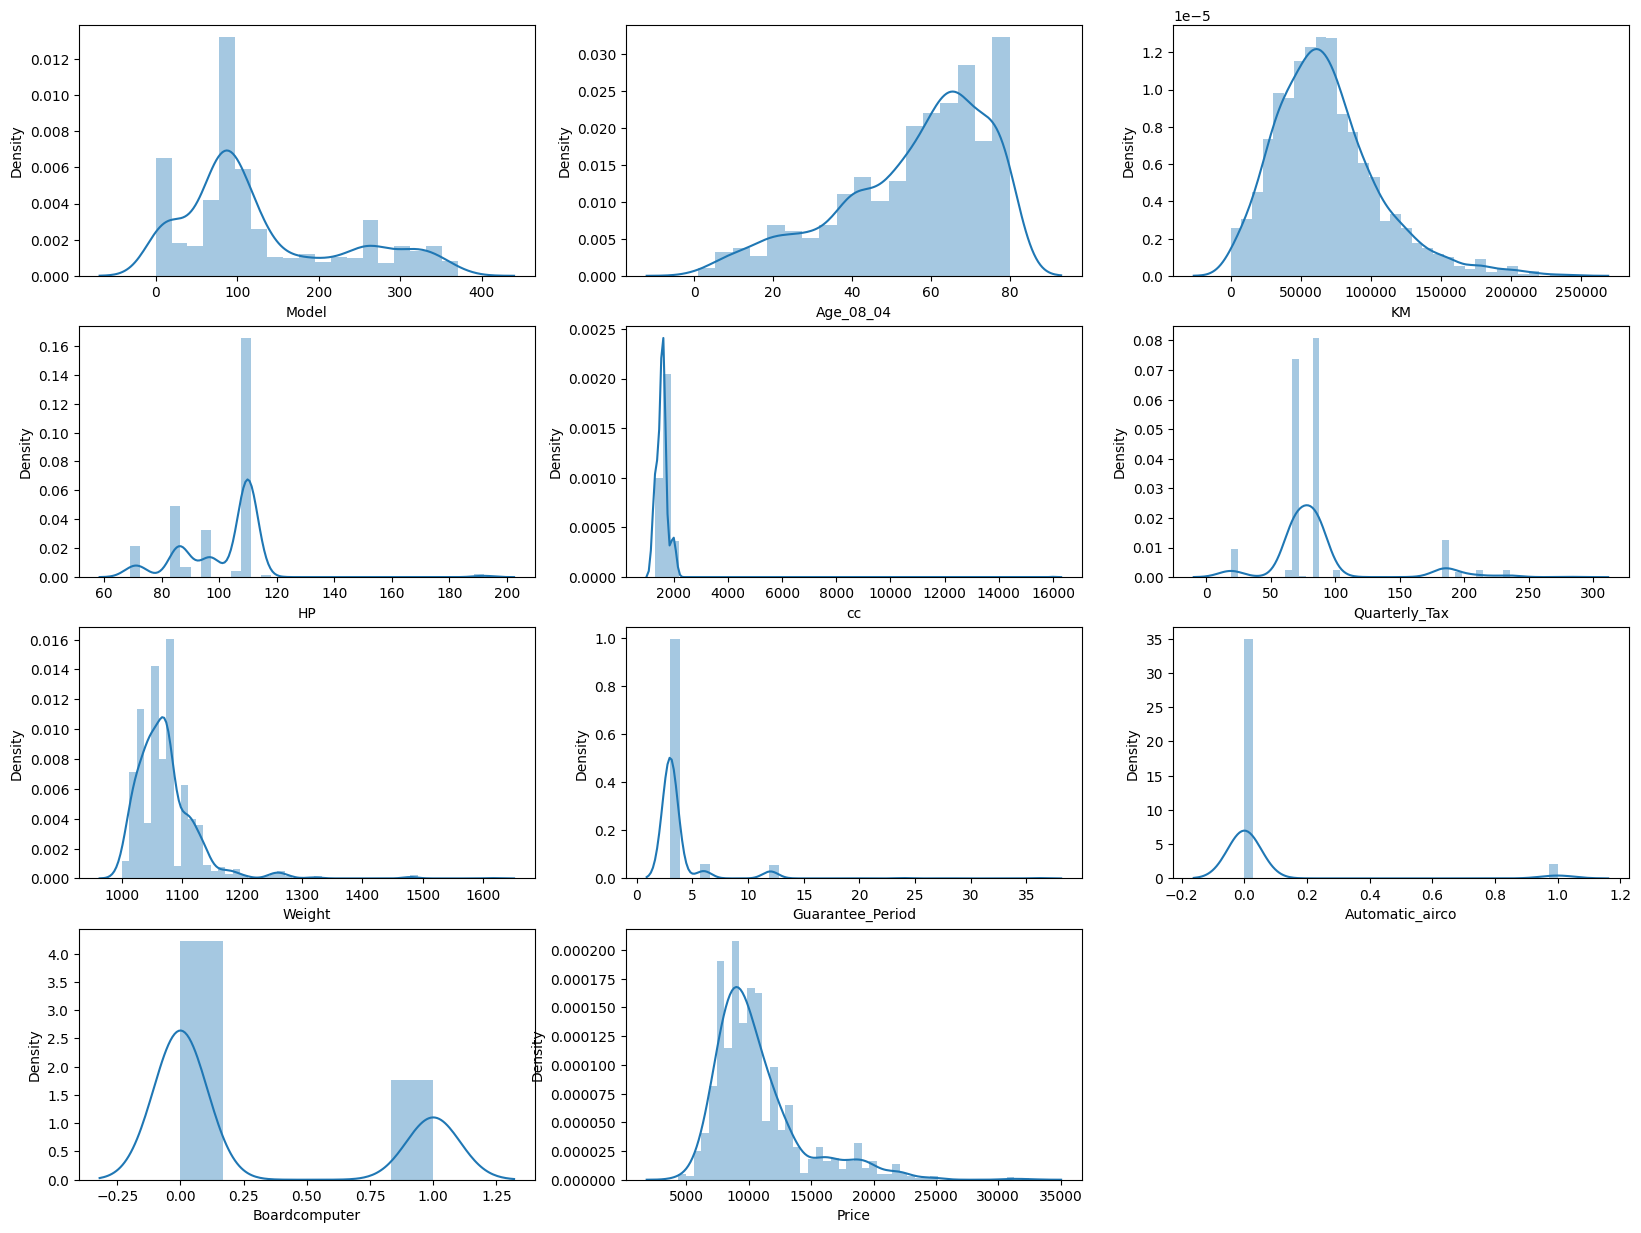

In [ ]:
features = ['Model',	'Age_08_04',	'KM',	'HP',	'cc',	'Quarterly_Tax',	'Weight',	'Guarantee_Period',	'Automatic_airco',	'Boardcomputer',	'Price']

plt.subplots(figsize=(20,15))
for i,col in enumerate(features):
  plt.subplot(4,3,i+1)
  sns.distplot(data[col])
plt.show()

<ipython-input-48-04855960501f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,i+1)


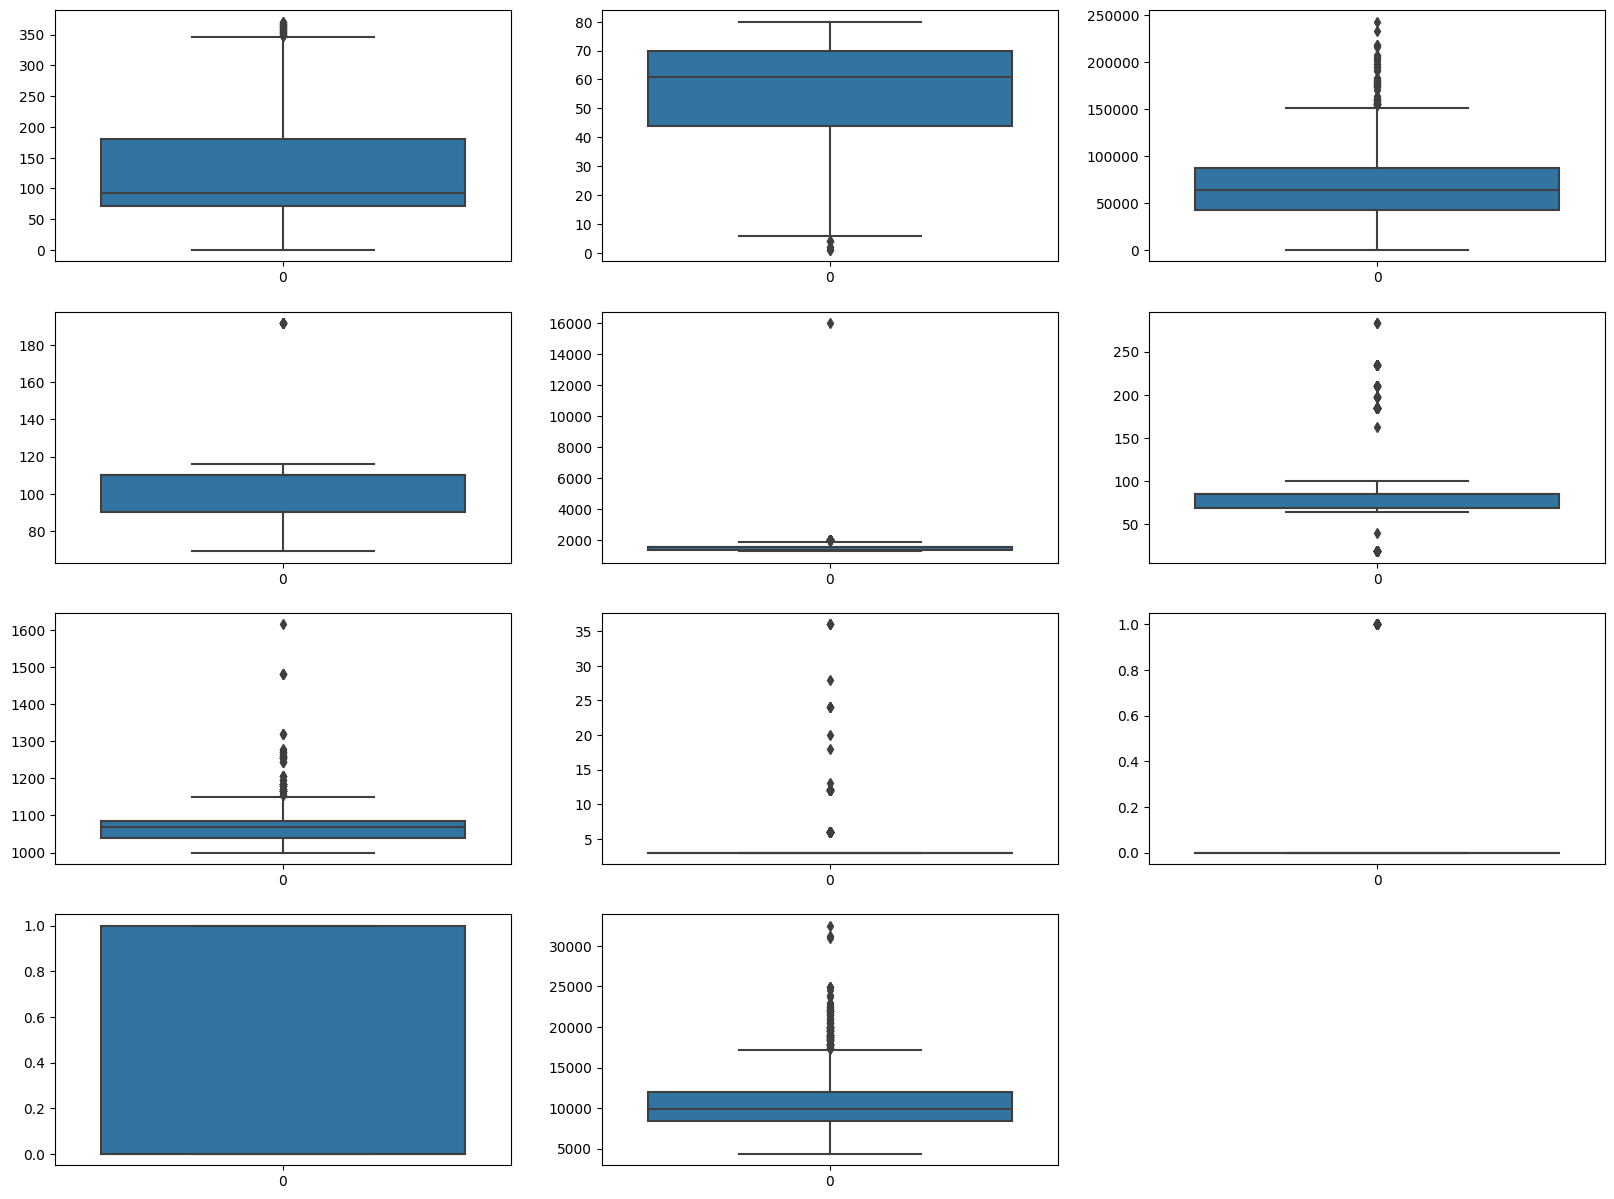

In [ ]:
features = ['Model',	'Age_08_04',	'KM',	'HP',	'cc',	'Quarterly_Tax',	'Weight',	'Guarantee_Period',	'Automatic_airco',	'Boardcomputer',	'Price']

plt.subplots(figsize=(20,15))
for i,col in enumerate(features):
  plt.subplot(4,3,i+1)
  sns.boxplot(data[col])
plt.show()

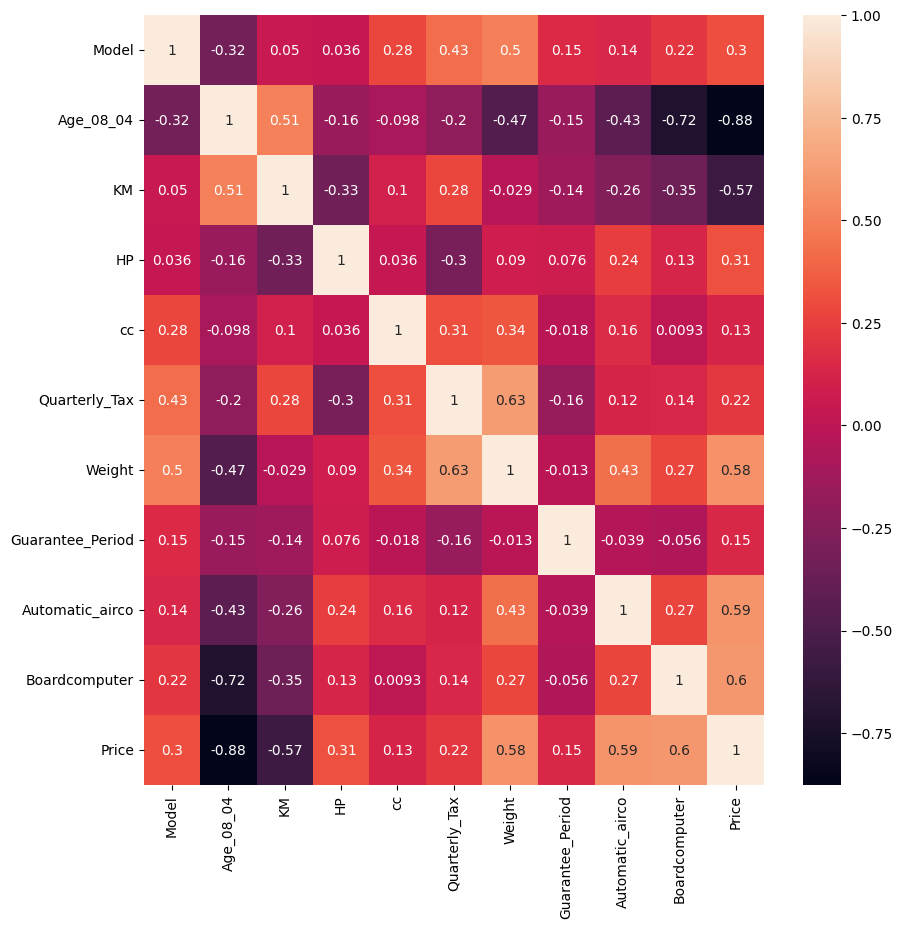

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cbar=True)
plt.show()

### **Linear Regression Using sm.OLS() without feature scaling**

In [ ]:
import statsmodels.api as sm

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_selected,y,test_size=0.2,random_state=0)

In [ ]:
x3=sm.add_constant(x_train)
model2=sm.OLS(y_train,x3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1004.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:40:33   Log-Likelihood:                -9733.4
No. Observations:                1148   AIC:                         1.949e+04
Df Residuals:                    1137   BIC:                         1.954e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1172.0432   1101.653      1.064      0.288    -989.458    3333.544
Model                0.2320      0.487      0.477      0.634      -0.723       1.187
Age_08_04         -113.4673      3.532    -32.125      0.000    -120.397    -106.537
KM                  -0.0171      0.001    -13.227      0.000      -0.020      -0.015
HP                  28.1609      2.987      9.427      0.000      22.300      34.022
cc                  -1.9258      0.343     -5.616      0.000      -2.599      -1.253
Quarterly_Tax        9.5789      1.481      6.467      0.000       6.673      12.485
Weight              14.9557      1.089     13.734      0.000      12.819      17.092
Guarantee_Period    58.0111     12.490      4.645      0.000      33.505      82.517
Automatic_airco   3061.1174    186.826     16.385      0.000    2694.554    3427.681
Boardcomputer     -120.6819    114.723     -1.052      0.293    -345.774     104.410
==============================================================================
Omnibus:                      130.363   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.392
Skew:                          -0.351   Prob(JB):                    2.50e-159
Kurtosis:                       6.844   Cond. No.                     2.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x4=sm.add_constant(x_test)
y_pred=model2.predict(x4)

In [ ]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
651,7950,8289.628632
411,10950,10311.973617
342,14950,12586.609481
1298,7500,7677.889168
483,9900,10373.174639
...,...,...
1029,10450,11168.826875
520,9400,10341.044042
996,9950,9951.498900
333,11750,12387.416053


In [ ]:
r2_score_ols=r2_score(y_test,y_pred)

In [ ]:
print('r2_score:',r2_score_ols)

r2_score: 0.6559300451624663


### **Linear Regression Using LinearRegression() from Sklearn Library**

In [ ]:
#feature scaling
sc=StandardScaler()
features=sc.fit_transform(x_selected)
target=y

In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=0)
print(x_train.shape,y_train.shape)

(1148, 10) (1148,)


In [ ]:
#Calling the model
reg=LinearRegression()

In [ ]:
#Fitting the model
model1=reg.fit(x_train,y_train)

In [ ]:
print("intercept:",model1.intercept_,"\nCoefficient:",model1.coef_)

intercept: 10735.647453597447 
Coefficient: [   22.7071222  -2109.75469641  -641.20183274   421.73394624
  -817.00363323   393.82779329   787.01264446   174.61189845
   706.21624197   -55.01267435]


In [ ]:
#Testing the model
y_pred=model1.predict(x_test)

In [ ]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
651,7950,8289.628632
411,10950,10311.973617
342,14950,12586.609481
1298,7500,7677.889168
483,9900,10373.174639
...,...,...
1029,10450,11168.826875
520,9400,10341.044042
996,9950,9951.498900
333,11750,12387.416053


**Model Evaluation**

In [ ]:
model1.score(x_test,y_test)

0.655930045162467

In [ ]:
mean_squared_error(y_test,y_pred)

4281017.915352022

In [ ]:
r2_score(y_test,y_pred)

0.655930045162467

### **Gradient Boosting method**

In [ ]:
clf=GradientBoostingRegressor(n_estimators=400,max_depth=5,min_samples_split=2,learning_rate=0.1,loss='squared_error')

In [ ]:
model_gb=clf.fit(x_train,y_train)

In [ ]:
y_pred=model_gb.predict(x_test)

In [ ]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
651,7950,9195.070424
411,10950,11356.450988
342,14950,13225.377381
1298,7500,7450.073462
483,9900,10909.037259
...,...,...
1029,10450,10751.871450
520,9400,9703.120291
996,9950,10331.394616
333,11750,12392.801660


**Model Evaluation**

In [ ]:
model_gb.score(x_test,y_test)

0.8812669702940883

In [ ]:
mean_squared_error(y_test,y_pred)

1477310.704316063

### **Support Vetor Regression**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_scaled = sc_x.fit_transform(x_train)
x_test_scaled= sc_x.fit_transform(x_test)
y_train_scaled = sc_y.fit_transform(y_train.ravel().reshape(-1,1))

In [ ]:
#Calling and Training of model
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(x_train_scaled, y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
#Testing the model
y_pred=regressor_svr.predict(x_test_scaled)

In [ ]:
y_pred=sc_y.inverse_transform(y_pred.reshape(-1,1))

In [ ]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred.reshape(-1)})

,y_test,y_pred
651,7950,8243.107333
411,10950,10250.669592
342,14950,12037.690436
1298,7500,7584.862582
483,9900,10295.452561
...,...,...
1029,10450,10664.503878
520,9400,10119.424621
996,9950,9551.621285
333,11750,11839.387219


**Model Evaluation**

In [ ]:
r2_score_svr=r2_score(y_test,y_pred)

In [ ]:
print('r2 score:',r2_score_svr)

r2 score: 0.8147135835834943


### **Decision Tree Regression**

In [ ]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor

regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
#testing the model
y_pred=regressor_dt.predict(x_test)

In [ ]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
651,7950,9950.0
411,10950,9950.0
342,14950,12200.0
1298,7500,7750.0
483,9900,12000.0
...,...,...
1029,10450,10950.0
520,9400,10900.0
996,9950,11500.0
333,11750,12950.0


**Model evaluation**

In [ ]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = x_train, y = y_train, cv = 10)

In [ ]:
r2_score_dt=r2_score(y_test,y_pred)

In [ ]:
print("r2 score:",r2_score_dt)

r2 score: 0.8779088885466976


### **Random Forest Regression**

In [ ]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 1200, random_state = 0)
regressor_rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1200, random_state=0)

In [ ]:
#Testing the model
y_pred=regressor_rf.predict(x_test)

In [ ]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
651,7950,9709.950000
411,10950,10373.854167
342,14950,12641.370833
1298,7500,7714.248333
483,9900,11358.633333
...,...,...
1029,10450,11186.529167
520,9400,10156.229167
996,9950,11032.145833
333,11750,12469.154167


**Model Evaluation**

In [ ]:
r2_score_dt=r2_score(y_test,y_pred)

In [ ]:
print("r2 score:",r2_score_dt)

r2 score: 0.8779088885466976


### **Prediction Using a New Data**

In [ ]:
newdata=pd.DataFrame({'Model':11,'Age_08_04':25,	'KM':17000,	'HP':86,	'cc':1300,	'Quarterly_Tax':69,	'Weight':1114,	'Guarantee_Period':3,	'Automatic_airco':1,	'Boardcomputer':1},index=[[1]])
newdata

,Model,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight,Guarantee_Period,Automatic_airco,Boardcomputer
1,11,25,17000,86,1300,69,1114,3,1,1


In [ ]:
regressor_dt.predict(sc.fit_transform(newdata))

array([10500.])

In [ ]:
regressor_rf.predict(sc.fit_transform(newdata))

array([11179.55416667])

In [ ]:
pred=regressor_svr.predict(sc_x.fit_transform(newdata))
pred=pred.ravel().reshape(-1,1)
sc_y.inverse_transform(pred)

array([[10123.42851633]])

In [ ]:
model1.predict(sc.fit_transform(newdata))

array([10735.6474536])

In [ ]:
model_gb.predict(sc.fit_transform(newdata))

array([10163.04068202])